## <b>Understanding Feedforward Neural Network</b>

In this assignment, you are required to build 3 Feedforward Neural Networks(FNNs) to simulate function
<br> $y = 7x_1^3 - x_2 \cdot x_1^2 \cdot \frac {1-e^{(x_1+1)x_2}}{1-e^{x_2+1}} $
<br> in range x1: +-10, x2: +-10
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 3.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> In the interval of x1: +-10, x2: +-10, generate 1000 data for x1 and 1000 data for x2.
<br>All data need to be separated by the same distance.

<br>That is, you need to generate one value for y for every 0.02 differences in x1 or x2,
<br>and have a total of 1000000 data in your training dataset.


In [ ]:
import numpy as np

# Define the function to compute y, vectorized for array inputs
#the function will calculate y value given x1 and x2 based on the formula
#no.clip prevents overflow.
def compute_stable_function_vectorized(x1, x2):
    numerator = 1 - np.exp(np.clip((x1 + 1) * x2, a_min=None, a_max=700))
    denominator = 1 - np.exp(np.clip(x2 + 1, a_min=None, a_max=700))
    y = 7 * x1**3 - x2 * x1**2 * (numerator / denominator)
    return y

# Define the intervals
x1_values = np.linspace(-10, 10, 1000)  # 1000000 points for x1
x2_values = np.linspace(-10, 10, 1000)  # 1000000 points for x2

# Generate a grid of x1 and x2 values
#np takes the arrays x1_values and x2_values and creates a 2d array on x1_grid and x2_grid
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)


# Compute y values for the entire grid using the vectorized function
#computes y for each combo of x1 and x2 using the function
y_grid = compute_stable_function_vectorized(x1_grid, x2_grid)

# Flatten the grids and create the training data array
#np.column_stack combines the 3 arrays into a single 2d array with 3 columns
training_data = np.column_stack((x1_grid.ravel(), x2_grid.ravel(), y_grid.ravel()))

# Print the shape of the generated data and the first 5 rows
print(training_data.shape)
print(training_data[:5])


(1000000, 3)
[[-4.00000000e+00 -4.00000000e+00 -1.09624569e+07]
 [-3.99199199e+00 -4.00000000e+00 -1.05744152e+07]
 [-3.98398398e+00 -4.00000000e+00 -1.02000274e+07]
 [-3.97597598e+00 -4.00000000e+00 -9.83881559e+06]
 [-3.96796797e+00 -4.00000000e+00 -9.49031863e+06]]


#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Assuming 'training_data' is your dataset
# gets data from the top dataset that was created
X = training_data[:, :2]  # Input features (first two columns)
y = training_data[:, 2]   # Target variable (third column)

# Split the data into training and testing sets (40% train, 60% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Model 1: Basic Model
#Sequential model is a linear stack of layers which is defined by 3 Dense layers.
#first one is 32 neurons w/ RElu active function. the input shape 2 means the input feature has 2 dimensions
#Second one is 16 neurons w/ REllu active function
#Third one is the OUTPUT
model_1 = Sequential([
    Dense(32, input_shape=(2,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
#compiles the model w/ the adam optimization and mean_squared_error
#Adam is a algo used for optimizing neural networks thats included in libraries in TensorFlow or Pytortch
model_1.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Assuming 'training_data' is your dataset
X = training_data[:, :2]  # Input features (first two columns)
y = training_data[:, 2]   # Target variable (third column)

# Split the data into training and testing sets (40% train, 60% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# model 2
model_2 = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
model_2.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Assuming 'training_data' is your dataset
X = training_data[:, :2]  # Input features (first two columns)
y = training_data[:, 2]   # Target variable (third column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# model 3

model_3 = Sequential([
    Dense(128, input_shape=(2,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
model_3.compile(optimizer='adam', loss='mean_squared_error')




#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

<br>If you are not sure how to do 3D plot, you may plot x1-y plane and x2-y plane separately

In [ ]:
# @title Default title text

#This entire block of code will measure 2 things: how well it learned using the training data
#and how it performs without training data

# Evaluate models on training data
train_loss_1 = model_1.evaluate(X_train, y_train)
train_loss_2 = model_2.evaluate(X_train, y_train)
train_loss_3 = model_3.evaluate(X_train, y_train)

# Evaluate models on test data
test_loss_1 = model_1.evaluate(X_test, y_test)
test_loss_2 = model_2.evaluate(X_test, y_test)
test_loss_3 = model_3.evaluate(X_test, y_test)

# Print the losses
print("Model 1 - Training Loss:", train_loss_1, "Test Loss:", test_loss_1)
print("Model 2 - Training Loss:", train_loss_2, "Test Loss:", test_loss_2)
print("Model 3 - Training Loss:", train_loss_3, "Test Loss:", test_loss_3)





18750/18750 [==============================] - 31s 2ms/step - loss: 10486484566016.0000
Model 1 - Training Loss: 9139797360640.0 Test Loss: 10486484566016.0
Model 2 - Training Loss: 9139797360640.0 Test Loss: 10486484566016.0
Model 3 - Training Loss: 9139797360640.0 Test Loss: 10486484566016.0


In [ ]:
# Generate predictions
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)


18750/18750 [==============================] - 30s 2ms/step


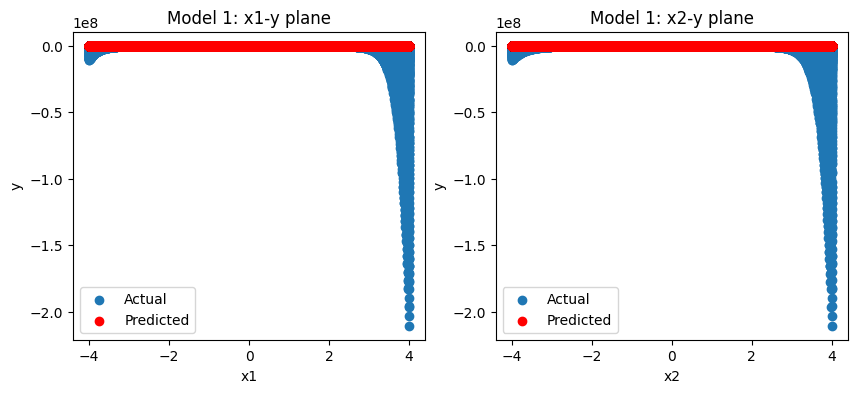

In [ ]:
import matplotlib.pyplot as plt

# Plotting for Model 1 - x1-y plane
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], y_pred_1, label='Predicted', color='r')
plt.title('Model 1: x1-y plane')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Plotting for Model 1 - x2-y plane
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, label='Actual')
plt.scatter(X_test[:, 1], y_pred_1, label='Predicted', color='r')
plt.title('Model 1: x2-y plane')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

plt.show()

# Repeat similar plots for Model 2 and Model 3


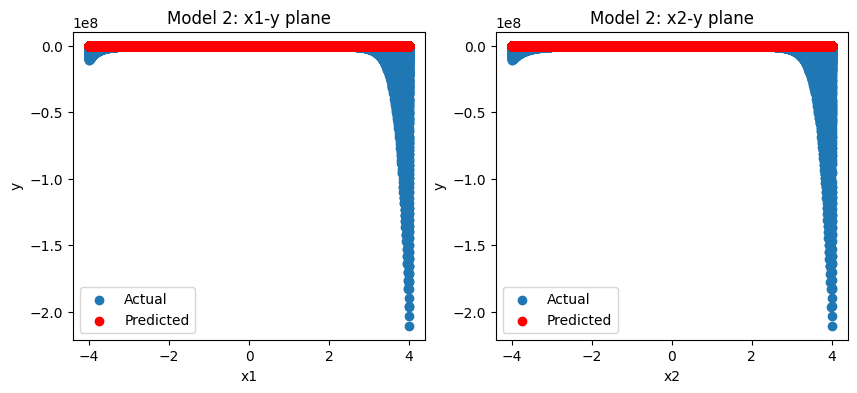

In [ ]:
import matplotlib.pyplot as plt

# Plotting for Model 1 - x1-y plane
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], y_pred_2, label='Predicted', color='r')
plt.title('Model 2: x1-y plane')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Plotting for Model 1 - x2-y plane
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, label='Actual')
plt.scatter(X_test[:, 1], y_pred_2, label='Predicted', color='r')
plt.title('Model 2: x2-y plane')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

plt.show()

# Repeat similar plots for Model 2 and Model 3


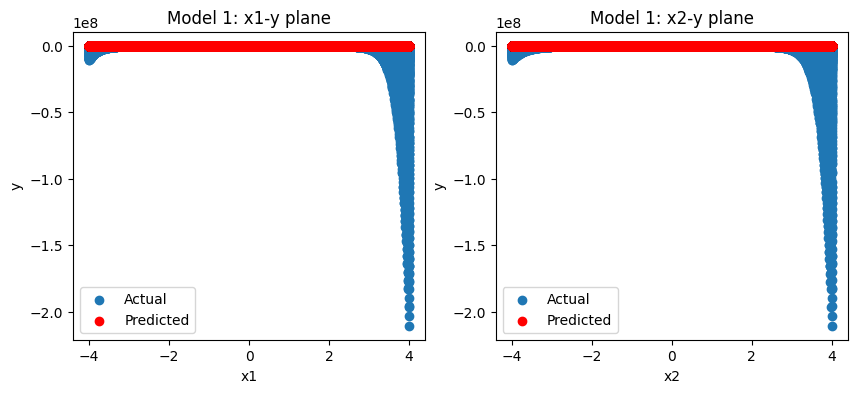

In [ ]:
import matplotlib.pyplot as plt

# Plotting for Model 1 - x1-y plane
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], y_pred_3, label='Predicted', color='r')
plt.title('Model 1: x1-y plane')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Plotting for Model 1 - x2-y plane
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, label='Actual')
plt.scatter(X_test[:, 1], y_pred_3, label='Predicted', color='r')
plt.title('Model 1: x2-y plane')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

plt.show()

# Repeat similar plots for Model 2 and Model 3


#### Part 4 get model output and feedforward by yourself

Recall how a FNN gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
<br> They should be identical for the first several digitals, if not for all digits.

In [ ]:


chosen_model = model_1



In [ ]:
# This will give you a list where weights and biases are alternately placed.
weights_and_biases = chosen_model.get_weights()


In [ ]:
sample_data = X_train[:5]


In [ ]:
def relu(x):
    return np.maximum(0, x)

# Assuming model_1 has 3 layers with ReLU activation in the first two layers and linear in the output layer
layer1_output = relu(np.dot(sample_data, weights_and_biases[0]) + weights_and_biases[1])
layer2_output = relu(np.dot(layer1_output, weights_and_biases[2]) + weights_and_biases[3])
model_output = np.dot(layer2_output, weights_and_biases[4]) + weights_and_biases[5]


In [ ]:
predicted_output = chosen_model.predict(sample_data)

# Print and compare both outputs
print("Manual Feedforward Output:\n", model_output)
print("\nModel Predict Output:\n", predicted_output)


1/1 [==============================] - 0s 96ms/step
Manual Feedforward Output:
 [[ 0.04577852]
 [ 0.00846979]
 [-0.54087179]
 [ 0.21185553]
 [ 0.33332181]]

Model Predict Output:
 [[ 0.04577851]
 [ 0.0084697 ]
 [-0.54087186]
 [ 0.21185547]
 [ 0.33332175]]
